## Scikit-learn tutorial: Baseball Analytics in Python 

This is a quick introduction to doing data analysis with Python - namely the two important libraries 
 1. For working with SQL-like data tables use [pandas](https://pandas.pydata.org), and
 2. for statistical modeling use [scikit-learn](http://scikit-learn.org/stable/).

I am essentially copying the nice introduction to scikit-learn that Brad found on [DataCamp](https://www.datacamp.com).  


https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1 <br>
https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2

I have adapted the first lesson here to use the `pybaseball` module instead of downloanding the data from Sean Lahman's [website.](http://seanlahman.com)

We will be working with a historical data set of MLB team's year over year statistics.  By the end we will have a predictive model that estimates the number of wins a team will have at the end of the season from on-field statistics (hits, ERA, strikeouts, runs, etc...).  Before that we will learn some basics of data prepping and modeling.

### pybaseball

This is a Python library for doing analytics on MLB baseball stats.  The GitHub repository for the library is linked below.

https://github.com/jldbc/pybaseball

The repository provides installation instructions, but essentially **run the next cell.**  After it is finished installing we need to restart this notebook's `kernel` so that library to be available to use.  To do that open the **Kernel** menu above and hitting *'Restart Kernel...'*.

In [49]:
! pip install pybaseball  #To run a notebook cell hit SHIFT+ENTER

If you want to learn more, feel free to look around the documentation on the GitHub repository linked below.

https://github.com/jldbc/pybaseball/tree/master/docs

Let's get started.

In [50]:
import pybaseball.lahman as l  # this is how you pull in additional packages

import pandas as pd

Next, we will collect two sets of data.  One called `teams` will have a variety of data about season by season performance of MLB teams (games played, wins, etc...), and `teams_franchises` contains more historical data (for example, if the team is still active today). 

Run the next cell to collect the data.

In [51]:
teams = l.teams()  # this collects the teams data from Lahman's website

teams_franchises = l.teams_franchises() # this collects the team franchise data

teams.to_csv("teams.csv")

teams_franchises.to_csv("teams_franchises.csv")

In [52]:
teams = pd.read_csv("teams.csv")

teams_franchises = pd.read_csv("teams_franchises.csv")

These two tables are stored as what is called a pandas `DataFrame` (think of a SQL table) it has rows and columns of typed data.  

* To see some basic info on `teams` run the next cell.
* To see the first few rows run the cell following.

In [53]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 49 columns):
Unnamed: 0        2835 non-null int64
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB      

Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below. A full list of the variables can be found [here.](http://seanlahman.com/files/database/readme2016.txt)

 * `yearID` - Year
 * `teamID` - Team
 * `franchID` - Franchise (links to TeamsFranchise table)
 * `G` - Games played
 * `W` - Wins
 * `LgWin` - League Champion(Y or N)
 * `WSWin` - World Series Winner (Y or N)
 * `R` - Runs scored
 * `AB` - At bats
 * `H` - Hits by batters
 * `HR` - Homeruns by batters
 * `BB` - Walks by batters
 * `SO` - Strikeouts by batters
 * `SB` - Stolen bases
 * `CS` - Caught stealing
 * `HBP` - Batters hit by pitch
 * `SF` - Sacrifice flies
 * `RA` - Opponents runs scored
 * `ER` - Earned runs allowed
 * `ERA` - Earned run average
 * `CG` - Complete games
 * `SHO` - Shutouts
 * `SV` - Saves
 * `IPOuts` - Outs Pitched (innings pitched x 3)
 * `HA` - Hits allowed
 * `HRA` - Homeruns allowed
 * `BBA` - Walks allowed
 * `SOA` - Strikeouts by pitchers
 * `E` - Errors
 * `DP` - Double Plays
 * `FP` - Fielding percentage
 * `name` - Team’s full name

In [54]:
teams.head()

,Unnamed: 0,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


##### Placeholder to do some EDA on `teams` to show off pandas a bit.

In [55]:
import pandas as pd # this is the typical alias for importing pandas

###Note:  I typically keep all of my import statements in the first cell of a notebook.

In [56]:
%matplotlib inline



Pandas is a powerful library, and one of the nice things is that you can do a wide variety of SQL-like operations with data.  For example, the next cell performs an `inner join` on `teams` and `teams_franchises` to create a DataFrame of active teams that have played in seasons with over 150 games. 

In [57]:
Teams = pd.merge(teams[(teams.G >= 150)], # left_df: a mask to filter teams down to row with over 150 games
                 teams_franchises[(teams_franchises.active == 'Y')], # right_df: a mask to filter just the acitve teams
                 how="inner", # the type of merge or join
                 on="franchID") # the column to match the DataFrames on

Teams.head()

,Unnamed: 0_x,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Unnamed: 0_y,franchName,active,NAassoc
0,280,1892,NL,BRO,LAD,NaN,3,158,NaN,95,...,183727.0,96,96,BRO,BRO,BRO,56,Los Angeles Dodgers,Y,NaN
1,364,1899,NL,BRO,LAD,NaN,1,150,NaN,101,...,269641.0,102,102,BRO,BRO,BRO,56,Los Angeles Dodgers,Y,NaN
2,432,1904,NL,BRO,LAD,NaN,6,154,76.0,56,...,214600.0,97,100,BRO,BRO,BRO,56,Los Angeles Dodgers,Y,NaN
3,448,1905,NL,BRO,LAD,NaN,8,155,77.0,48,...,227924.0,93,96,BRO,BRO,BRO,56,Los Angeles Dodgers,Y,NaN
4,464,1906,NL,BRO,LAD,NaN,5,153,76.0,66,...,277400.0,92,96,BRO,BRO,BRO,56,Los Angeles Dodgers,Y,NaN


We will start preparing the data so we can eventually run some statistical models on it.  This tutorial shows how to use sklearn to perform two algorithms
1. **K-means clustering** 
2. **Linear Regression**

First let's drop some of the columns that won't be used.

In [58]:
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']  # this is a standard Python data type called a list.  


Teams.drop(drop_cols, axis=1, inplace=True) # inplace=True allows us to update the data in one step.

#Note:  
#The default behavior of pandas is to not change the data, 
#so if you are making changes to a DataFrame you will need to 
#use the inplace parameter when available or save the changes in a new variable

### Brief lesson on null or NA values

The `pd.DataFrame.isnull()` method lets you see how many NA values are in a DataFrame.  To see some documentation on this or any python object simply type a `?` after the object you want to learn about.  For example, run the next cell.

In [59]:
Teams.isnull?

Signature: Teams.isnull()
Docstring:
Return a boolean same-sized object indicating if the values are NA.

See Also
--------
DataFrame.notna : boolean inverse of isna
DataFrame.isnull : alias of isna
isna : top-level isna
File:      ~/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py
Type:      method


In [60]:
Teams.isnull().sum(axis=0).tolist() # this prints the number of NA values in each column

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 110,
 0,
 419,
 1777,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 22,
 0,
 0]

We can make this a little more useful in the next cell. I am using a Python `dictionary` constructed using a *list comprehension* method (the embedded `for` statement). 

In [61]:
{list(Teams.columns)[i] : Teams.isnull().sum(axis=0).tolist()[i] 
 for i in range(len(Teams.columns))}

{'2B': 0,
 '3B': 0,
 'AB': 0,
 'BB': 0,
 'BBA': 0,
 'CG': 0,
 'CS': 419,
 'DP': 22,
 'E': 0,
 'ER': 0,
 'ERA': 0,
 'FP': 0,
 'G': 0,
 'H': 0,
 'HA': 0,
 'HBP': 1777,
 'HR': 0,
 'HRA': 0,
 'IPouts': 0,
 'R': 0,
 'RA': 0,
 'SB': 0,
 'SHO': 0,
 'SO': 110,
 'SOA': 0,
 'SV': 0,
 'Unnamed: 0_x': 0,
 'Unnamed: 0_y': 0,
 'W': 0,
 'teamID': 0,
 'yearID': 0}

In [62]:
# Eliminating columns with a lot null values
Teams = Teams.drop(['CS','HBP'], axis=1)

# Filling null values to the median for the remainer
Teams['SO'] = Teams['SO'].fillna(Teams['SO'].median())
Teams['DP'] = Teams['DP'].fillna(Teams['DP'].median())

# Print out null values of all columns of `df`
print(Teams.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Plotting with Matplotlib

There are numerous plotting libraries at your disposal within the python eco-system.  The canonical library is [Matplotlib](https://matplotlib.org).  

In [63]:
# This allows us to display plots within the notebook
%matplotlib inline  
import matplotlib.pyplot as plt  # the standard alias for matplotlib.

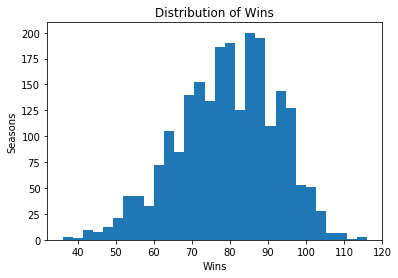

In [64]:
# Plotting distribution of wins
plt.hist(Teams['W'], bins=30) # method for histograms
plt.xlabel('Wins')
plt.ylabel("Seasons")
plt.title('Distribution of Wins')

plt.show()

In [65]:
Teams.W.mean()

79.23043288150416

### How to write a Python function

Python operates with colons and white space to dictate the logical sequence of the code, and not *curly braces* `{}` that are common in other languages.  This might be a challenge to remember at first, but you get the hang of it, and it helps keep the code tidyer and easier to follow.

Template for a function

```python
def fn(param): #colon
    val = param # white space of 4 spaces 
    for i in [1, 2, 3]: #colon
        val = val - i # white space
    return val # note that we reduced white space
```

In [66]:
# Creating bins for the win column
def assign_win_bins(W): # note the colons (NEEDED AFTER CONTROL FLOW STATEMENTS)
    if W < 50: # <- here
        return 1
    if W >= 50 and W <= 69: # <- here
        return 2
    if W >= 70 and W <= 89: # <- here
        return 3
    if W >= 90 and W <= 109: # <- here
        return 4
    if W >= 110: # <- here
        return 5
        
# Apply `assign_win_bins` to `Teams['W']`    
Teams['win_bins'] = Teams['W'].apply(assign_win_bins)

Teams.head()

,Unnamed: 0_x,yearID,teamID,G,W,R,AB,H,2B,3B,...,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Unnamed: 0_y,win_bins
0,280,1892,BRO,158,95,935,5485,1439,183,105,...,4215,1285,26,600,597,398,147.0,0.940,56,4
1,364,1899,BRO,150,101,892,4937,1436,178,97,...,3807,1320,32,463,331,314,147.0,0.948,56,4
2,432,1904,BRO,154,56,497,4917,1142,159,53,...,4011,1281,27,414,453,343,87.0,0.945,56,2
3,448,1905,BRO,155,48,506,5100,1255,154,60,...,4041,1416,24,476,556,408,101.0,0.937,56,1
4,464,1906,BRO,153,66,496,4897,1156,141,68,...,4044,1255,15,453,476,283,73.0,0.955,56,2


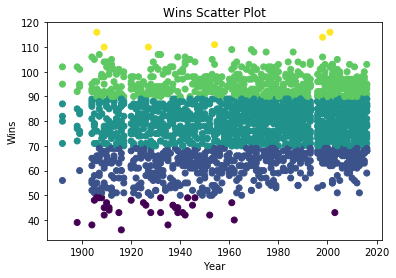

In [67]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(Teams['yearID'], Teams['W'], c=Teams['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [68]:
Teams = Teams[Teams.yearID >= 1900]  # this is an example where the data change is not save by default and we save a new variable

### Group by with Pandas

More SQL-like functionality of Pandas.

In [69]:
Teams.groupby("yearID").W.sum().head()

yearID
1904    1220
1905    1218
1906    1130
1907    1120
1908    1228
Name: W, dtype: int64

In [70]:
year = Teams.groupby("yearID")["R", "G", "HR"].sum() # group by syntax
year.head()

,R,G,HR
yearID,,,
1904,9307,2498,331
1905,9640,2474,338
1906,8322,2307,231
1907,8186,2317,233
1908,8423,2488,267


In [71]:
year = year.assign(mlb_rpg = year.R/year.G) # my prefered syntax for adding a column

year.loc[1904:1910, :] # an alternate way to view the first few rows.  This highlights that yearID is now the index.

,R,G,HR,mlb_rpg
yearID,,,,
1904,9307,2498,331,3.725781
1905,9640,2474,338,3.896524
1906,8322,2307,231,3.607282
1907,8186,2317,233,3.533017
1908,8423,2488,267,3.385450
1909,8805,2482,260,3.547542
1910,9580,2498,361,3.835068


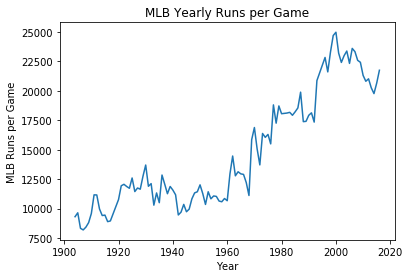

In [72]:
# Create line plot of Year vs. MLB runs per Game
plt.plot(year.index, year.R)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [73]:
# Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `Teams`    
Teams = Teams.assign(year_label = Teams['yearID'].apply(assign_label))

Teams.head()

,Unnamed: 0_x,yearID,teamID,G,W,R,AB,H,2B,3B,...,HA,HRA,BBA,SOA,E,DP,FP,Unnamed: 0_y,win_bins,year_label
2,432,1904,BRO,154,56,497,4917,1142,159,53,...,1281,27,414,453,343,87.0,0.945,56,2,1
3,448,1905,BRO,155,48,506,5100,1255,154,60,...,1416,24,476,556,408,101.0,0.937,56,1,1
4,464,1906,BRO,153,66,496,4897,1156,141,68,...,1255,15,453,476,283,73.0,0.955,56,2,1
5,480,1907,BRO,153,65,446,4895,1135,142,63,...,1218,16,463,479,262,94.0,0.959,56,2,1
6,496,1908,BRO,154,53,377,4897,1044,110,60,...,1165,17,444,535,241,66.0,0.961,56,2,1


In [74]:
dummy_df = pd.get_dummies(Teams['year_label'], prefix='era')

# Concatenate `Teams` and `dummy_df`
Teams = pd.concat([Teams, dummy_df], axis=1) # the axis=1 statement indicates we are stacking columns

Teams.head()

,Unnamed: 0_x,yearID,teamID,G,W,R,AB,H,2B,3B,...,win_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
2,432,1904,BRO,154,56,497,4917,1142,159,53,...,2,1,1,0,0,0,0,0,0,0
3,448,1905,BRO,155,48,506,5100,1255,154,60,...,1,1,1,0,0,0,0,0,0,0
4,464,1906,BRO,153,66,496,4897,1156,141,68,...,2,1,1,0,0,0,0,0,0,0
5,480,1907,BRO,153,65,446,4895,1135,142,63,...,2,1,1,0,0,0,0,0,0,0
6,496,1908,BRO,154,53,377,4897,1044,110,60,...,2,1,1,0,0,0,0,0,0,0


In [75]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
 

In [76]:
Teams['decade_label'] = Teams['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(Teams['decade_label'], prefix='decade')

Teams = pd.concat([Teams, decade_df], axis=1) # the axis=1 statement indicates we are stacking columns

Teams.head()

,Unnamed: 0_x,yearID,teamID,G,W,R,AB,H,2B,3B,...,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
2,432,1904,BRO,154,56,497,4917,1142,159,53,...,0,0,0,0,0,0,0,0,0,0
3,448,1905,BRO,155,48,506,5100,1255,154,60,...,0,0,0,0,0,0,0,0,0,0
4,464,1906,BRO,153,66,496,4897,1156,141,68,...,0,0,0,0,0,0,0,0,0,0
5,480,1907,BRO,153,65,446,4895,1135,142,63,...,0,0,0,0,0,0,0,0,0,0
6,496,1908,BRO,154,53,377,4897,1044,110,60,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Create new features for Runs per Game and Runs Allowed per Game
Teams = Teams.assign(R_per_game = Teams['R'] / Teams['G'] ,
                     RA_per_game = Teams['RA'] / Teams['G'])

# Merge the mlb_rpg from years back to Teams
Teams = pd.merge(Teams, year.loc[:, "mlb_rpg"].to_frame(), # the .to_frame() is a technically detail we can discuss later
                 how="left", left_on="yearID", right_index=True) # note how we are indicating the join columns

# Drop unnecessary columns
Teams.drop(['yearID','year_label','decade_label'], axis=1, inplace=True)

Teams.head()

,Unnamed: 0_x,teamID,G,W,R,AB,H,2B,3B,HR,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg
2,432,BRO,154,56,497,4917,1142,159,53,15,...,0,0,0,0,0,0,0,3.227273,3.987013,3.725781
3,448,BRO,155,48,506,5100,1255,154,60,29,...,0,0,0,0,0,0,0,3.264516,5.206452,3.896524
4,464,BRO,153,66,496,4897,1156,141,68,25,...,0,0,0,0,0,0,0,3.241830,4.084967,3.607282
5,480,BRO,153,65,446,4895,1135,142,63,18,...,0,0,0,0,0,0,0,2.915033,3.411765,3.533017
6,496,BRO,154,53,377,4897,1044,110,60,28,...,0,0,0,0,0,0,0,2.448052,3.350649,3.385450


## Predicting wins

We are now finished prepping the data and will now show you how to build a model to predict wins in a season.

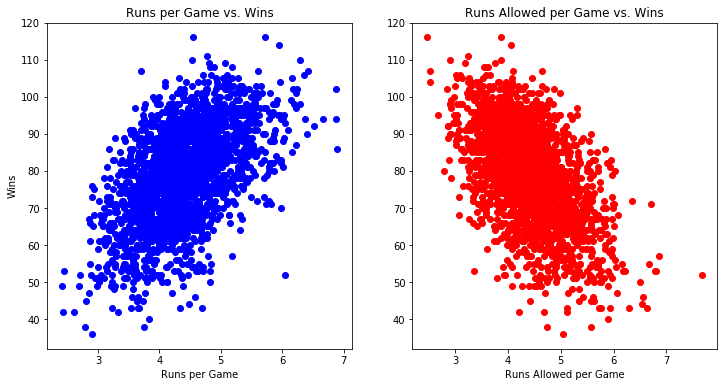

In [78]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(Teams['R_per_game'], Teams['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(Teams['RA_per_game'], Teams['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()


In [79]:
Teams.corr()["W"] # Produces the correlations with the column "W"

Unnamed: 0_x    0.138880
G               0.178958
W               1.000000
R               0.551504
AB              0.233996
H               0.380281
2B              0.262323
3B              0.016970
HR              0.312713
BB              0.345348
SO              0.072069
SB              0.133300
RA             -0.518313
ER             -0.372580
ERA            -0.425833
CG             -0.041788
SHO             0.426892
SV              0.382174
IPouts          0.326087
HA             -0.384893
HRA             0.009880
BBA            -0.284782
SOA             0.259205
E              -0.304725
DP              0.015192
FP              0.319597
Unnamed: 0_y    0.047403
win_bins        0.912545
era_1          -0.077104
era_2          -0.083089
era_3          -0.033073
era_4          -0.052278
era_5           0.042122
era_6           0.058439
era_7           0.066049
era_8           0.043453
decade_1910    -0.077104
decade_1920    -0.055176
decade_1930    -0.052358
decade_1940    -0.050249


## Clustering the variables

Next we will produce clusters in the data from the predictors

In [80]:
attributes = ['G','R','AB','H','2B','3B','HR',
              'BB','SO','SB','RA','ER','ERA','CG',
              'SHO','SV','IPouts','HA','HRA','BBA',
              'SOA','E','DP','FP','era_1','era_2',
              'era_3','era_4','era_5','era_6','era_7',
              'era_8','decade_1910','decade_1920',
              'decade_1930','decade_1940','decade_1950',
              'decade_1960','decade_1970','decade_1980',
              'decade_1990','decade_2000','decade_2010',
              'R_per_game','RA_per_game', 'mlb_rpg']

data_attributes = Teams[attributes]

# Print the first rows of `df`
data_attributes.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg
2,154,497,4917,1142,159,53,15,411,855.0,205.0,...,0,0,0,0,0,0,0,3.227273,3.987013,3.725781
3,155,506,5100,1255,154,60,29,327,855.0,186.0,...,0,0,0,0,0,0,0,3.264516,5.206452,3.896524
4,153,496,4897,1156,141,68,25,388,855.0,175.0,...,0,0,0,0,0,0,0,3.241830,4.084967,3.607282
5,153,446,4895,1135,142,63,18,336,855.0,121.0,...,0,0,0,0,0,0,0,2.915033,3.411765,3.533017
6,154,377,4897,1044,110,60,28,323,855.0,113.0,...,0,0,0,0,0,0,0,2.448052,3.350649,3.385450


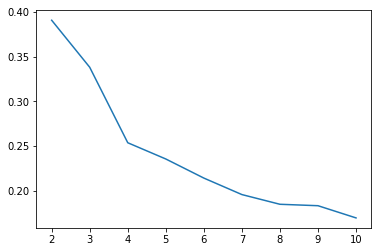

In [81]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
plt.plot(s_score_dict.keys(), s_score_dict.values());

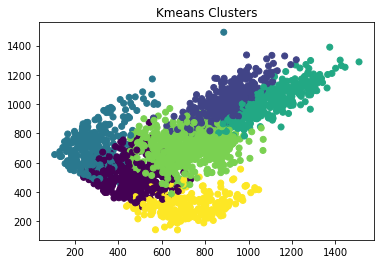

In [82]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,2], distances[:,5], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [83]:
# Add labels from K-means model to `df` DataFrame and attributes list
Teams = Teams.assign(labels = labels)

decade_df = pd.get_dummies(Teams['labels'], prefix='cluster')

Teams = pd.concat([Teams, decade_df], axis=1)

Teams.drop('labels', axis=1, inplace=True)

for i in range(6):
    attributes.append('cluster_{}'.format(i))

# Print the first rows of `Teams`
Teams.head()

,Unnamed: 0_x,teamID,G,W,R,AB,H,2B,3B,HR,...,decade_2010,R_per_game,RA_per_game,mlb_rpg,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
2,432,BRO,154,56,497,4917,1142,159,53,15,...,0,3.227273,3.987013,3.725781,0,0,0,0,0,1
3,448,BRO,155,48,506,5100,1255,154,60,29,...,0,3.264516,5.206452,3.896524,0,0,0,0,0,1
4,464,BRO,153,66,496,4897,1156,141,68,25,...,0,3.241830,4.084967,3.607282,0,0,0,0,0,1
5,480,BRO,153,65,446,4895,1135,142,63,18,...,0,2.915033,3.411765,3.533017,0,0,0,0,0,1
6,496,BRO,154,53,377,4897,1044,110,60,28,...,0,2.448052,3.350649,3.385450,0,0,0,0,0,1


In [84]:
attributes

['G',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'HA',
 'HRA',
 'BBA',
 'SOA',
 'E',
 'DP',
 'FP',
 'era_1',
 'era_2',
 'era_3',
 'era_4',
 'era_5',
 'era_6',
 'era_7',
 'era_8',
 'decade_1910',
 'decade_1920',
 'decade_1930',
 'decade_1940',
 'decade_1950',
 'decade_1960',
 'decade_1970',
 'decade_1980',
 'decade_1990',
 'decade_2000',
 'decade_2010',
 'R_per_game',
 'RA_per_game',
 'mlb_rpg',
 'cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5']

### A few words about sklearn

Sklearn provides a consistent modeling framework (API?) that can produce very much *drag-n-drop* functionality.

This is the basic framework

```python
# Import your favorite algorith, e.g. linear_model, cluster
from sklearn.algorithm_family import FavAlgo

# Create an instance of the algorithm
model = FavAlgo(param_0, param_1, ...)

# Fit the model 
results = model.fit(X, y)

# Get results from the model
results.predict(X)
results.other_neat_stuff(...) # such as coefficients, errors, scores, fitted values, etc...
```

In addition to the models, sklearn provides a beginning to end framework for modeling, for example data processing and splitting, feature selection, cross validation, and metrics.  For example, here is how you would split your data into a training versus a test data sets.

In [85]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

X, y = Teams[attributes], Teams.W

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=1)

In [86]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
# Determine mean absolute error
mae_train = mean_absolute_error(y_train, lr.predict(X_train))
mae_test = mean_absolute_error(y_test, lr.predict(X_test))

# Print `mae`
print("Training mean error:", mae_train)
print("Testing mean error:", mae_test)

print("Training R2:", lr.score(X_train, y_train))
print("Testing R2:", lr.score(X_test, y_test))

Training mean error: 2.688447213999177
Testing mean error: 2.8635210456626896
Training R2: 0.9318796534552499
Testing R2: 0.9234133710907895


In [87]:
{attributes[i]: round(lr.coef_[i], 3) for i in range(len(attributes))} 

{'2B': 0.003,
 '3B': -0.003,
 'AB': -0.034,
 'BB': -0.006,
 'BBA': -0.006,
 'CG': 0.117,
 'DP': -0.001,
 'E': -0.05,
 'ER': -0.147,
 'ERA': 21.941,
 'FP': -195.052,
 'G': -0.957,
 'H': 0.029,
 'HA': -0.004,
 'HR': 0.006,
 'HRA': -0.007,
 'IPouts': 0.069,
 'R': 0.081,
 'RA': 0.139,
 'RA_per_game': -30.726,
 'R_per_game': 0.516,
 'SB': -0.0,
 'SHO': 0.139,
 'SO': 0.001,
 'SOA': 0.001,
 'SV': 0.314,
 'cluster_0': 0.591,
 'cluster_1': -0.189,
 'cluster_2': 0.425,
 'cluster_3': -0.026,
 'cluster_4': 0.047,
 'cluster_5': -1.155,
 'decade_1910': -0.828,
 'decade_1920': -1.692,
 'decade_1930': 1.425,
 'decade_1940': 2.273,
 'decade_1950': 0.215,
 'decade_1960': 0.111,
 'decade_1970': 0.119,
 'decade_1980': -0.25,
 'decade_1990': -1.009,
 'decade_2000': -0.045,
 'decade_2010': 0.193,
 'era_1': -0.828,
 'era_2': 0.087,
 'era_3': 0.104,
 'era_4': -0.161,
 'era_5': 0.679,
 'era_6': -0.239,
 'era_7': 0.073,
 'era_8': 0.193,
 'mlb_rpg': 0.716}

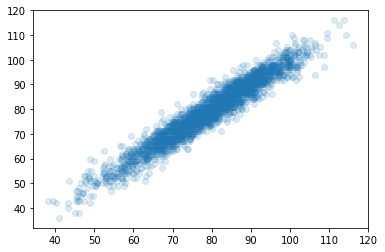

In [88]:
plt.scatter(lr.predict(X), y, alpha=.15)

We can apply regularization to the linear model below if you so wish.  Just another example of the *drag-n-drop* nature of the process.

In [89]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(X_train, y_train)
predictions_rrm = rrm.predict(X_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)
print(rrm.score(X_test, y_test))

2.8885777655954197
0.9223267949833143


In [90]:
{attributes[i]: (round(lr.coef_[i], 3), round(rrm.coef_[i], 3)) for i in range(len(attributes))}

{'2B': (0.003, 0.005),
 '3B': (-0.003, 0.003),
 'AB': (-0.034, -0.023),
 'BB': (-0.006, -0.002),
 'BBA': (-0.006, -0.007),
 'CG': (0.117, 0.097),
 'DP': (-0.001, -0.002),
 'E': (-0.05, -0.017),
 'ER': (-0.147, -0.006),
 'ERA': (21.941, -1.584),
 'FP': (-195.052, 54.683),
 'G': (-0.957, -0.004),
 'H': (0.029, 0.021),
 'HA': (-0.004, -0.004),
 'HR': (0.006, 0.01),
 'HRA': (-0.007, -0.004),
 'IPouts': (0.069, 0.034),
 'R': (0.081, 0.041),
 'RA': (0.139, -0.024),
 'RA_per_game': (-30.726, -4.089),
 'R_per_game': (0.516, 6.484),
 'SB': (-0.0, 0.004),
 'SHO': (0.139, 0.164),
 'SO': (0.001, -0.0),
 'SOA': (0.001, 0.001),
 'SV': (0.314, 0.296),
 'cluster_0': (0.591, 0.672),
 'cluster_1': (-0.189, -0.186),
 'cluster_2': (0.425, 0.372),
 'cluster_3': (-0.026, -0.135),
 'cluster_4': (0.047, -0.057),
 'cluster_5': (-1.155, -0.803),
 'decade_1910': (-0.828, -0.351),
 'decade_1920': (-1.692, -0.79),
 'decade_1930': (1.425, 1.363),
 'decade_1940': (2.273, 1.929),
 'decade_1950': (0.215, 0.157),
 'dec

## Further Reading

For a general introduction to all of the tools.
[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook)

For a deeper introduction to Pandas + others.
[Python for Data Analysis](https://github.com/wesm/pydata-book)

For a deeper introduction to Sklearn.
[Introduction to Machine Learning with Python: A Guide for Data Scientist](https://github.com/amueller/introduction_to_ml_with_python)

For Python quickly.
[A Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/)

Talk to me if you'd like to borrow any of these - I have digital copies.